## Aqui faremos um projeto de regressão

### 1. Planejamento

Dados Coletdos do endereço: https://www.kaggle.com/camnugent/california-housing-prices

Caso você não tenha um fonte de dados você pode usar um webscraping

### 2. Importando os dados

#### Começaremos usando a boblioteca para organizar o dat frame

In [1]:
import pandas as pd
housing = pd.read_csv("housing.csv")

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#com .info poderemos ver as informações doa dados note que o total de quartos está menor que o restante dos numeros
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#com .describe veremos as estatisticas dos dados
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

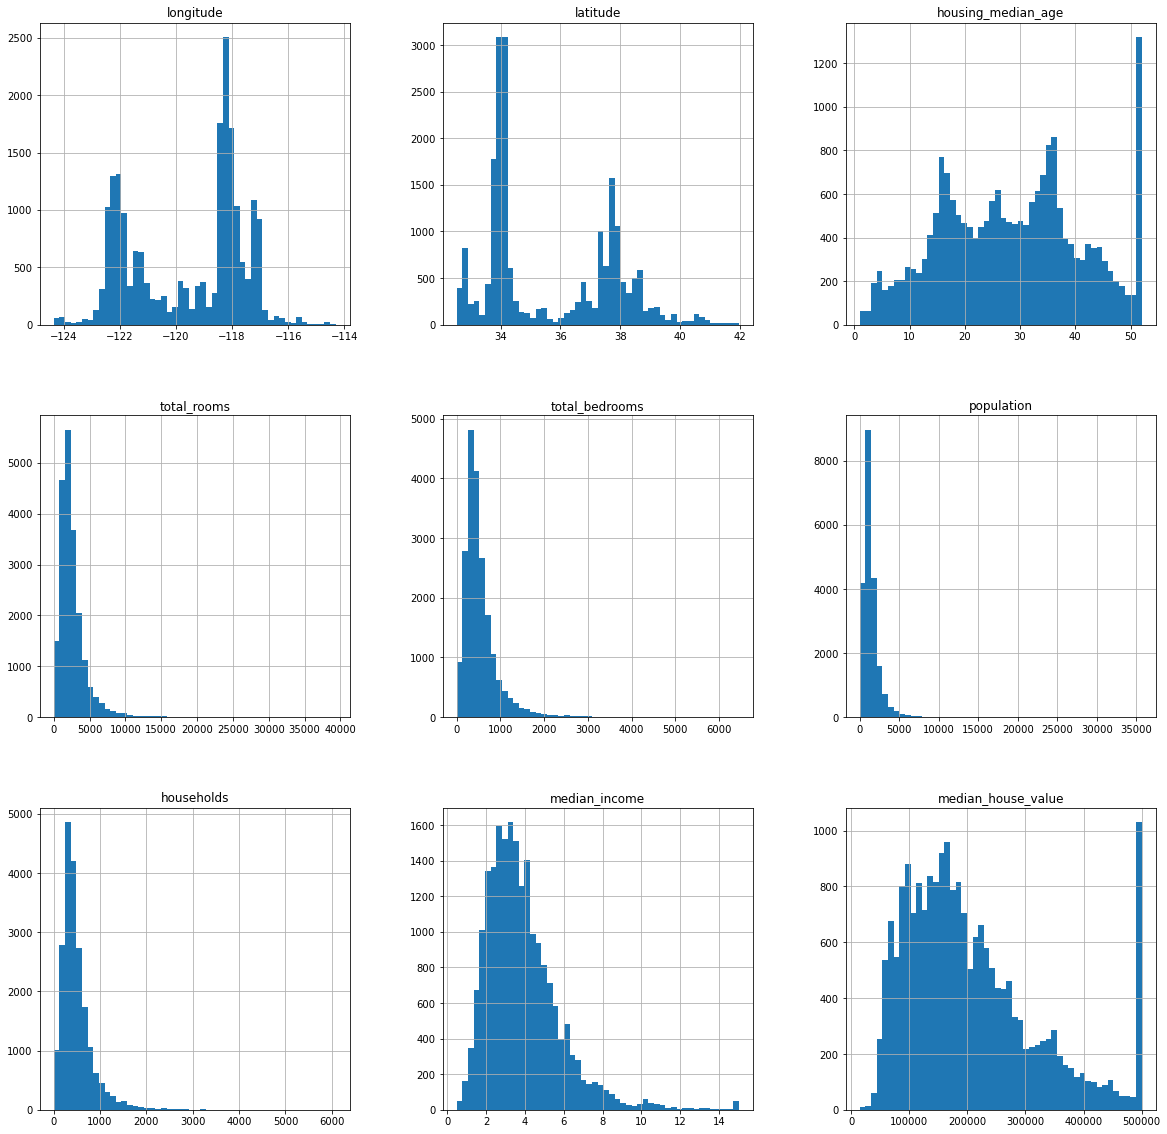

In [5]:
#vendo a distribuição dos dados com histograma para vermos como está sua distribuição
housing.hist(bins=50 , figsize=(20,20))

### 3. Preparando os dados

Agora vamos seprar o que será para treinamento e o que será para teste
recomenda-se usar de 70 a 80 porcento para treinamento e 30 a 20 porcento para testes

In [6]:
#usaremos 80% dos dados para testes nesse caso, segue a formula para saber quantos dados usaremos
int(len(housing)*0.8)

16512

Usaremos a biblioteca Sklean para treinar e testar os dados

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
train , test = train_test_split(housing,
                                random_state=42,
                                test_size=0.2,
                               )

In [9]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [10]:
#criada variavel categorica de acordo com a renda
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.,np.inf], labels=[1,2,3,4,5])

In [11]:
housing['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

<AxesSubplot:>

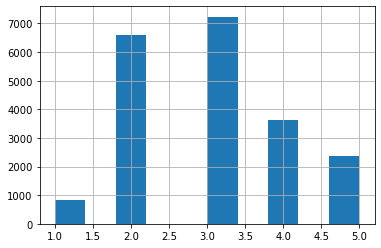

In [12]:
housing["income_cat"].hist()

In [13]:
housing["income_cat"].value_counts(normalize=True)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [14]:
strat_train_set, strat_test_set = train_test_split(housing,
                                random_state=42,
                                test_size=0.2,
                                stratify=housing["income_cat"])

In [15]:
strat_train_set["income_cat"].value_counts(normalize=True)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [16]:
strat_test_set["income_cat"].value_counts(normalize=True)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [17]:
strat_test_set.drop("income_cat", axis=1, inplace=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


Ou

In [18]:
strat_test_set = strat_test_set.drop("income_cat", axis=1)

In [19]:
strat_train_set = strat_train_set.drop("income_cat", axis=1)

### 4.Analise exploratoria dos dados

Utilizaremos latitude de longitude no scatterplot para que ele apareça em formato de mapa

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

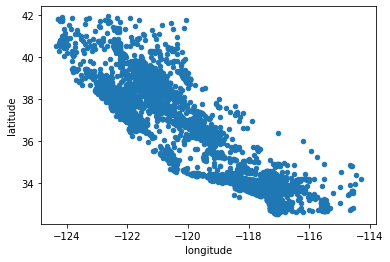

In [20]:
strat_train_set.plot(kind="scatter", x="longitude",y="latitude")

Utilizaremos o argumento alpha==0.1 para que os pontos com maior volume sejam evdenciados

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

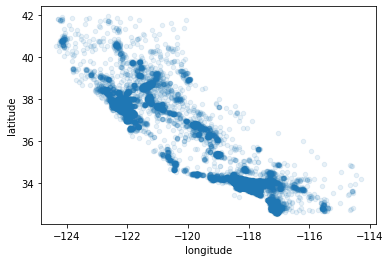

In [21]:
strat_train_set.plot(kind="scatter", x="longitude",y="latitude", alpha=0.1)

#### Aqui vamos usar as Bibliotecas Matplotlib e Seaborn para explorar um pouco mais dos graficos

In [22]:
import matplotlib.pyplot as plt

Agora vamos colocar o grafico em formato de mapa de calor para que possamos ver onde esta a maiorc oncentração de pessoas

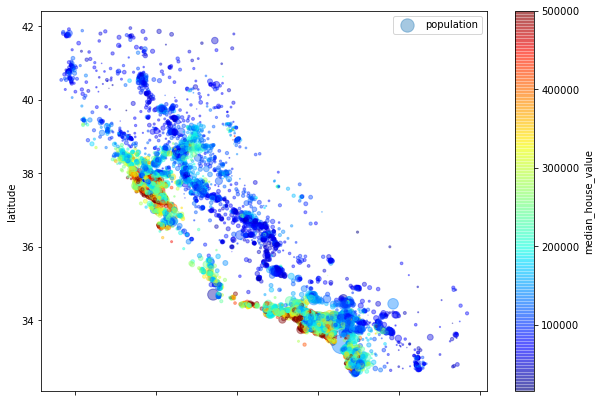

In [23]:
strat_train_set.plot(kind="scatter",
                    x="longitude",
                    y="latitude",
                    alpha=0.4,
                    s=strat_train_set["population"]/100,
                    label="population",
                    figsize=(10,7),
                    c="median_house_value",
                    cmap=plt.get_cmap("jet"),
                    colorbar=True,
                    )
plt.legend()

Improtaremos seaborn para plotar diferentes grafico e fazermos outros tipos de analises

In [24]:
import seaborn as sns

Então separamos os atributos que vamos utilziar

In [25]:
atributes = ["median_house_value","median_income","total_rooms","housing_median_age"]

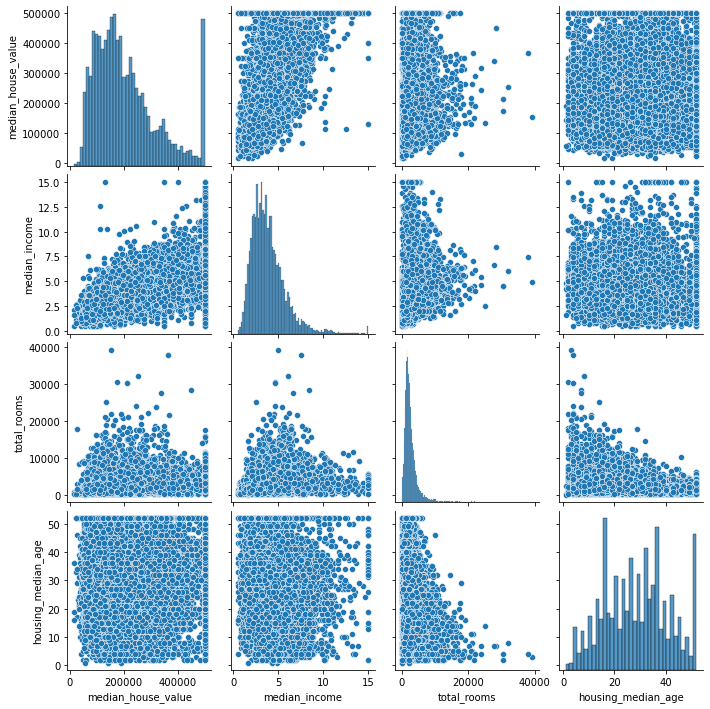

In [26]:
sns.pairplot(strat_train_set[atributes])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

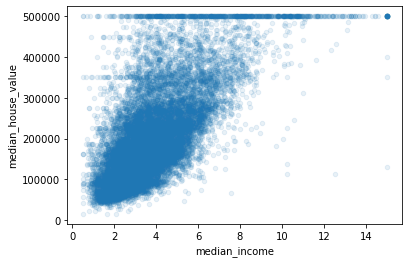

In [27]:
strat_train_set.plot(kind="scatter", x="median_income",y="median_house_value", alpha=0.1)

#### Agora vamos explorar numericamente as correlações vistas acima e engenharia de atributos

In [28]:
#vendo a correlação
strat_train_set.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


<AxesSubplot:>

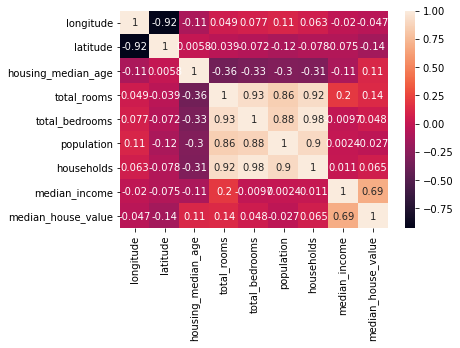

In [29]:
#Mapa de calor
sns.heatmap(strat_train_set.corr(), annot=True)

In [30]:
strat_train_set["rooms_per_holseholds"] = strat_train_set["total_rooms"]/strat_train_set["households"]
strat_train_set["bedrooms_per_rooms"] = strat_train_set["total_bedrooms"]/strat_train_set["total_rooms"]
strat_train_set["population_per_holseholds"] = strat_train_set["population"]/strat_train_set["households"]

In [31]:
strat_test_set["rooms_per_holseholds"] = strat_test_set["total_rooms"]/strat_test_set["households"]
strat_test_set["bedrooms_per_rooms"] = strat_test_set["total_bedrooms"]/strat_test_set["total_rooms"]
strat_test_set["population_per_holseholds"] = strat_test_set["population"]/strat_test_set["households"]

In [32]:
corr_matrix = strat_train_set.corr()

In [33]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
rooms_per_holseholds         0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
population_per_holseholds   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_per_rooms          -0.259984
Name: median_house_value, dtype: float64

### 5. Machine Learning

#### Preparação dos dados para machine learning

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_holseholds,bedrooms_per_rooms,population_per_holseholds
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [36]:
x_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"]

x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"]

#### Tratando dados ausentes

In [37]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  16512 non-null  float64
 1   latitude                   16512 non-null  float64
 2   housing_median_age         16512 non-null  float64
 3   total_rooms                16512 non-null  float64
 4   total_bedrooms             16354 non-null  float64
 5   population                 16512 non-null  float64
 6   households                 16512 non-null  float64
 7   median_income              16512 non-null  float64
 8   ocean_proximity            16512 non-null  object 
 9   rooms_per_holseholds       16512 non-null  float64
 10  bedrooms_per_rooms         16354 non-null  float64
 11  population_per_holseholds  16512 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.6+ MB


In [38]:
x_train.median()

longitude                    -118.510000
latitude                       34.260000
housing_median_age             29.000000
total_rooms                  2119.500000
total_bedrooms                433.000000
population                   1164.000000
households                    408.000000
median_income                   3.540900
rooms_per_holseholds            5.232284
bedrooms_per_rooms              0.203031
population_per_holseholds       2.817653
dtype: float64

In [39]:
x_train.fillna(x_train.median()).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  16512 non-null  float64
 1   latitude                   16512 non-null  float64
 2   housing_median_age         16512 non-null  float64
 3   total_rooms                16512 non-null  float64
 4   total_bedrooms             16512 non-null  float64
 5   population                 16512 non-null  float64
 6   households                 16512 non-null  float64
 7   median_income              16512 non-null  float64
 8   ocean_proximity            16512 non-null  object 
 9   rooms_per_holseholds       16512 non-null  float64
 10  bedrooms_per_rooms         16512 non-null  float64
 11  population_per_holseholds  16512 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.6+ MB


In [40]:
x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_test.median())

Dados Ausentes em colunas categoricas

In [41]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_holseholds,bedrooms_per_rooms,population_per_holseholds
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,0.231341,3.047847


In [42]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

#### Tratando por escala

In [43]:
x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_holseholds,bedrooms_per_rooms,population_per_holseholds,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589,5.440341,0.212784,3.096437,0.440649,0.318738,0.000121,0.111858,0.128634
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950,2.611712,0.057112,11.584826,0.496480,0.466001,0.011005,0.315201,0.334804
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.130435,0.100000,0.692308,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775,4.442040,0.175576,2.431287,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,5.232284,0.203031,2.817653,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475,6.056361,0.239307,3.281420,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,141.909091,1.000000,1243.333333,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
x_train.columns[:-5]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_holseholds', 'bedrooms_per_rooms',
       'population_per_holseholds'],
      dtype='object')

#### Pegando apenas os valores numericos do data-set

In [45]:
num_attributes = x_train.columns[:-5]

In [46]:
x_train[num_attributes]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_holseholds,bedrooms_per_rooms,population_per_holseholds
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,5.505618,0.193878,3.808989


#### Ajustando escala

In [47]:
from sklearn.preprocessing import RobustScaler

In [48]:
trasformer = RobustScaler()
trasformer.fit(x_train[num_attributes])

RobustScaler()

In [49]:
x_train[num_attributes] = trasformer.transform(x_train[num_attributes])

In [50]:
x_train[num_attributes].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_holseholds,bedrooms_per_rooms,population_per_holseholds
17606,-0.891821,0.801587,0.473684,-0.324794,-0.237681,-0.485432,-0.213622,-0.384213,-0.375957,0.326698,-0.850758
18632,-0.902375,0.738095,-0.789474,-0.848351,-0.942029,-0.917402,-0.913313,1.322726,0.481048,-0.689997,-0.129025
14650,0.345646,-0.394180,0.105263,-0.098645,0.110145,-0.243785,0.167183,-0.311705,-0.623901,0.600334,-0.931241
3230,-0.290237,0.542328,-0.210526,-0.160483,-0.179710,0.316493,-0.170279,-0.760895,0.000006,-0.033973,1.550728
3555,-0.021108,-0.007937,-0.631579,2.633981,3.165217,3.523122,3.266254,-0.232447,-0.450019,0.444208,0.270774


<AxesSubplot:>

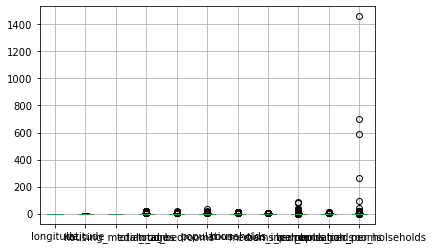

In [51]:
x_train[num_attributes].boxplot()

#### Atribuindo valor de outlier e filtrando

In [52]:
filter_outliers = x_train[num_attributes]<4
x_train[num_attributes][filter_outliers]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_holseholds,bedrooms_per_rooms,population_per_holseholds
17606,-0.891821,0.801587,0.473684,-0.324794,-0.237681,-0.485432,-0.213622,-0.384213,-0.375957,0.326698,-0.850758
18632,-0.902375,0.738095,-0.789474,-0.848351,-0.942029,-0.917402,-0.913313,1.322726,0.481048,-0.689997,-0.129025
14650,0.345646,-0.394180,0.105263,-0.098645,0.110145,-0.243785,0.167183,-0.311705,-0.623901,0.600334,-0.931241
3230,-0.290237,0.542328,-0.210526,-0.160483,-0.179710,0.316493,-0.170279,-0.760895,0.000006,-0.033973,1.550728
3555,-0.021108,-0.007937,-0.631579,2.633981,3.165217,3.523122,3.266254,-0.232447,-0.450019,0.444208,0.270774
...,...,...,...,...,...,...,...,...,...,...,...
6563,0.100264,-0.015873,0.894737,-0.499706,-0.571014,-0.631917,-0.613003,0.638426,0.508014,-0.272252,-0.104785
12053,0.250660,-0.100529,0.578947,-0.543875,-0.402899,-0.119754,-0.464396,-0.676264,-0.369583,0.671389,1.481965
13908,0.556728,-0.044974,-1.052632,1.611013,1.272464,0.998663,1.105263,-0.123341,0.690149,-0.367527,-0.088420
11159,0.131926,-0.116402,0.105263,-0.093934,-0.153623,0.205293,-0.160991,0.239519,0.169318,-0.143633,1.166096


<AxesSubplot:>

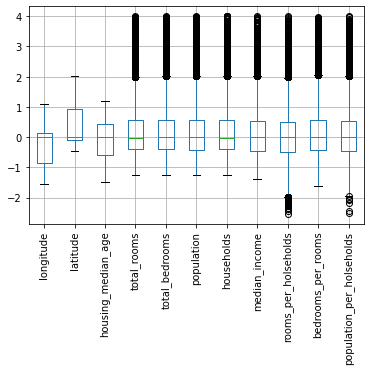

In [53]:
#rot = rotação
x_train[num_attributes][filter_outliers].boxplot(rot=90)

In [54]:
x_test[num_attributes] = trasformer.transform(x_test[num_attributes])

In [55]:
x_test[num_attributes].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_holseholds,bedrooms_per_rooms,population_per_holseholds
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-0.273136,0.354761,-0.021841,0.334748,0.333903,0.303898,0.314108,0.142397,0.093756,0.165259,0.176294
std,0.530412,0.562828,0.664746,1.381548,1.309744,1.279966,1.261896,0.862961,1.129027,0.941387,1.863980
min,-1.496042,-0.452381,-1.473684,-1.247055,-1.252174,-1.239241,-1.260062,-1.396427,-2.717013,-1.616671,-2.033056
25%,-0.862797,-0.089947,-0.578947,-0.380153,-0.379710,-0.383053,-0.386997,-0.458236,-0.494170,-0.418777,-0.461658
50%,0.014512,-0.010582,-0.052632,0.022968,0.023188,0.008554,0.024768,-0.012008,-0.008368,0.008025,0.006389
75%,0.139842,0.907407,0.421053,0.619258,0.631884,0.630847,0.634675,0.550489,0.495213,0.564696,0.551539
max,1.042216,2.034392,1.210526,17.966726,17.426087,29.299118,17.566563,5.262065,19.718022,12.505277,71.673940


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lin_reg = LinearRegression()

Ajustado a partir do metodo fit que fara o treinamento ( a busca pelos dados  de treinamento)

In [58]:
lin_reg.fit(x_train,y_train)

LinearRegression()

Metodo predict com base me alguns valores aqui usaremos os 10 primeiros do conjunto de teste

In [59]:
lin_reg.predict(x_test.head(10))

array([429417.88288737, 260560.08076998, 223919.41768249, 200568.54298666,
       162254.27332648, 148170.36434215,  25581.70729935, 370661.04767018,
       127050.62469983,  94595.41721171])

Comparando com os dados reais

In [60]:
y_test.head(10).values

array([500001., 240300., 218200., 182100., 121300., 120600.,  72300.,
       500001.,  98900.,  82600.])

Calculando erro

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mean_squared_error(y_test.head(10).values, lin_reg.predict(x_test.head(10)))

2805139345.3094454

In [63]:
np.sqrt(mean_squared_error(y_test.head(10).values, lin_reg.predict(x_test.head(10))))

52963.56620649185

In [64]:
y_pred_train = lin_reg.predict(x_train)

In [65]:
y_pred_train[:10]

array([209375.74268037, 315154.78319184, 210238.27856353,  55902.61573275,
       183416.68718873, 154170.62093876, 427863.34850507, 225391.83028935,
       138345.7856693 ,  54350.38041904])

In [66]:
y_train[:10].values

array([286600., 340600., 196900.,  46300., 254500., 127900., 500001.,
       140200.,  95000., 500001.])

In [67]:
lin_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

In [68]:
lin_rmse

68161.22644433199

Treinando um arvore de decisão

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
tree_reg = DecisionTreeRegressor()

In [71]:
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [73]:
y_pred_train = tree_reg.predict(x_train)

In [74]:
tree_lin_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tree_lin_rmse

75842.29516568316

In [75]:
y_pred_test = tree_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred_test))

0.0

Validação Cruzada

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [78]:
scores

array([-4.93384255e+09, -4.71370925e+09, -5.01427746e+09, -4.67810882e+09,
       -4.80404819e+09, -5.42309790e+09, -5.02583183e+09, -4.79268815e+09,
       -5.78502264e+09, -4.77049506e+09])

In [79]:
tree_rmse_scores = np.sqrt(-scores)

In [80]:
np.mean(tree_rmse_scores)

70630.94185548884

In [81]:
np.std(tree_rmse_scores)

2319.9647863442983

replicando para regressão lnear

In [82]:
scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [83]:
np.mean(lin_rmse_scores)

68480.58471553595

In [84]:
np.std(lin_rmse_scores)

2845.5843092650703

Validação Cruzada com Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

In [86]:
np.sqrt(mean_squared_error(y_train, reg.predict(x_train)))

18671.207892269522

In [87]:
scores = cross_val_score(reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)

In [88]:
np.mean(rf_rmse_scores)

50174.43825493321

In [89]:
np.std(rf_rmse_scores)

1941.7977511564186

Calibração dos modelos

Busca em grade com validação cruzada

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = [{'n_estimators':[3,10,3,], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'n_estimators' :[3,10], 'max_features':[2,3,4]}]

In [94]:
rf=RandomForestRegressor()

In [96]:
grid_search = GridSearchCV(rf , param_grid, scoring="neg_mean_squared_error",return_train_score=True)

In [97]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 3]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [98]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [100]:
rf_calibrate = grid_search.best_estimator_

In [105]:
rf_calibrate

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [104]:
np.sqrt(-grid_search.best_score_)

51531.68727428021

### 6. Comunicação de resultados

### 7. Deploy